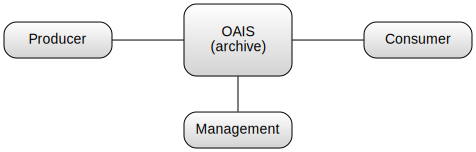

In [2]:
import graphviz
from myst_nb import glue

source = """
graph oais {
    rankdir=BT;
    
    node [color=Black,fontname=Arial,shape="box",style="rounded,filled",fillcolor="lightgrey:white", gradientangle=90,width="1.5",height="0.5"];
    
    man [label="Management"];
    
    nodesep=1;
    sip [label="Producer"];
    aip [label="OAIS\n(archive)", height="1.0"];
    dip [label="Consumer"];
    
    sip -- aip -- dip;
    man -- aip;
    
    {rank=same; aip, dip, sip}
}
"""
dia = graphviz.Source(source, format='svg')
glue("oais_environment_dot", dia)

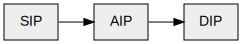

In [6]:
source = """
digraph oais_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    
    sip [label="SIP"];
    dip [label="DIP"];
    aip [label="AIP"];
    sip -> aip -> dip;
}
"""
glue("flow_line_dot", graphviz.Source(source, format='svg'))

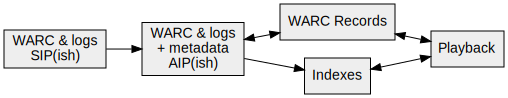

In [7]:
source = """
digraph warc_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    
    sip [label="WARC & logs\nSIP(ish)"];
    aip [label="WARC & logs\n + metadata\nAIP(ish)"];
    dip [label="WARC Records"];
    idx [label="Indexes"];
    ply [label="Playback"];
    sip -> aip;
    aip -> dip [dir=both];
    aip -> idx;
    idx -> ply [dir=both];
    dip -> ply [dir=both];
    
    {rank=same; dip idx}
}
"""
glue("flow_line_warc_dot", graphviz.Source(source, format='svg'))

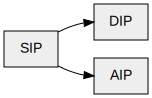

In [8]:
source = """
digraph fork_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];
    
    sip [label="SIP"];
    dip [label="DIP"];
    aip [label="AIP"];

    sip -> aip:w;
    sip -> dip:w;
}
"""
glue("flow_fork_dot", graphviz.Source(source, format='svg'))

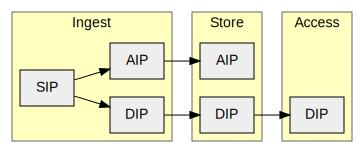

In [9]:
source = """
digraph longtime_ingestdip {
    rankdir=LR;
    newrank=true;
        
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    
    subgraph cluster_ingest {
        label="Ingest" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
        isip [label="SIP"];
        idip [label="DIP"];
        iaip [label="AIP"];
    }
      
    subgraph cluster_store {
        label="Store" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
      saip [label="AIP"]; 
      sdip [label="DIP"];
    }
    
    subgraph cluster_access {
        label="Access" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
        aaip [label="DIP",style=invis];
        adip [label="DIP"];
    }
    
    isip -> idip -> sdip -> adip;
    isip -> iaip -> saip;
    saip -> aaip [style=invis];
      
}
"""
glue("flow_fork_dip_ingest_dot", graphviz.Source(source, format='svg'))

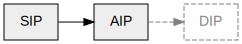

In [10]:
source = """
digraph fork_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];
    
    sip [label="SIP"];
    aip [label="AIP"];
    dip [label="DIP", color="gray",fontcolor="gray",fillcolor="#fefefe", style="filled,dashed"]

    sip -> aip;
    aip -> dip [style=dashed, color=grey];
}
"""
glue("flow_stop_dot", graphviz.Source(source, format='svg'))

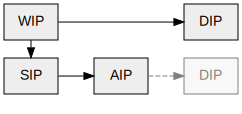

In [11]:
source = """
digraph upstream_fork {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];
    
    subgraph cluster1 {
      up [label="WIP"];
      dip [label="DIP"];
      up->dip;
    }
    
    subgraph cluster2 {
      sip [label="SIP"];
      aip [label="AIP"];
      adip [label="DIP", color=grey, fontcolor=gray, fillcolor="#f8f8f8"];
      color=invis;

      sip -> aip;
      aip -> adip [color=Grey, style=dashed];
    }

    up->sip [constraint=false];
    
    {rank=same; up sip}
    {rank=same; dip adip}
}
"""
glue("flow_sidecar_dot", graphviz.Source(source, format='svg'))